Below is the class definition for the network, and the photonic neuron:

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib as mpl
from photonic_neuron import neuron
from photonic_network import network
import scipy.signal as sig
mpl.style.use('default')

So far the neuron class implements the mrr weight bank weighting of signals coming in, outputting both add and drop values. Currently the "weight" being given to the network is proportional to the current going into the heater. Below, I tested the effect of the transfer function over different wavelengths, using different supplied current values.

The network class just contains a list of neurons with weights and a list of signals in a waveguide.

In [ ]:
W = np.linspace(10,15,3)
lambs = np.linspace(1500,1520,500) * 1e-9
T = []
D = []
for w in W:
    thrus = []
    drops = []
    for l in lambs:
        system = network([[w]], wavelengths = [l])
        thrus.append(system.neurons[0].weightBankTransmission(system.waveguide[:,0])[0])
        drops.append(system.neurons[0].weightBankTransmission(system.waveguide[:,0])[1])
    T.append(thrus)
    D.append(drops)

plt.figure()
for i,t in enumerate(T): 
    line = plt.plot(lambs*1e9, t, 'C' + str(i))
    
for i,d in enumerate(D): 
    line = plt.plot(lambs*1e9, d, '--C' + str(i))

ax1 = plt.gca()
ax1.legend(['I_Heater=' + str(w) for w in W])
plt.xlabel('Wavelength [e-9 nm]')
plt.ylabel('Transmission [a.u.]')
plt.show()

In [6]:
T = [float(i) for i in range(6000)]
s = [25e-3 + (12e-3 * sig.sawtooth(2*np.pi*t/1000)) for t in T]
net = network([[0.75]], weightsIn = [3], wavelengthIn = 1555e-9, signalIn = s)
sim = net.simulate()
out1 = []
out2 = []
ext = []
for t in T:
    out1.append(net.waveguide[0,1])
    out2.append(net.getState(2)+0.05)
    ext.append(net.signalIn[0])
    next(sim)

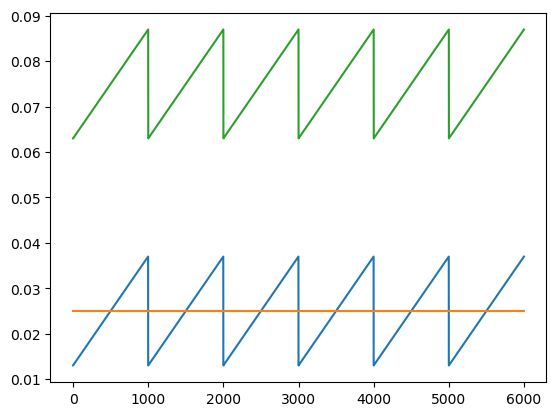

In [7]:
plt.plot(T,ext)
plt.plot(T,out1)
plt.plot(T,out2)
plt.show()
